In [1]:
# Preparing Data for Analysis

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 

In [5]:
files=os.listdir('C:\\Users\\Jayanta Roy\\Sales_Data')
files

['all_data.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [6]:
path='C:\\Users\\Jayanta Roy\\Sales_Data'
all_data=pd.DataFrame()


for file in files:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])
    
all_data.shape

(988036, 6)

In [7]:
all_data.to_csv('C:\\Users\\Jayanta Roy\\Sales_Data/all_data.csv',index=False)

In [8]:
# Analyzing Monthly Sales

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
all_data.isnull().sum()

Order ID            2890
Product             2890
Quantity Ordered    2890
Price Each          2890
Order Date          2890
Purchase Address    2890
dtype: int64

In [11]:
all_data=all_data.dropna(how='all')
all_data.shape

(985146, 6)

In [12]:
'04/19/19 08:46'.split('/')[0]

'04'

In [14]:
def month(x):
    return x.split('/')[0]

In [15]:
all_data['month']=all_data['Order Date'].apply(month)

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [17]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [18]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [19]:
filter=all_data['month']=='Order Date'
all_data=all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [20]:
all_data['month']=all_data['month'].astype(int)

In [21]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [22]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)


In [23]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [24]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [26]:
all_data.groupby('month')['sales'].sum()

month
1      9119722.01
2     11010112.10
3     14035501.90
4     20338851.02
5     15773593.04
6     12889011.30
7     13238878.80
8     13464654.97
9     10489897.39
10    18683634.40
11    15998016.00
12    27359079.23
Name: sales, dtype: float64

Text(0, 0.5, 'Sales in US Dollars')

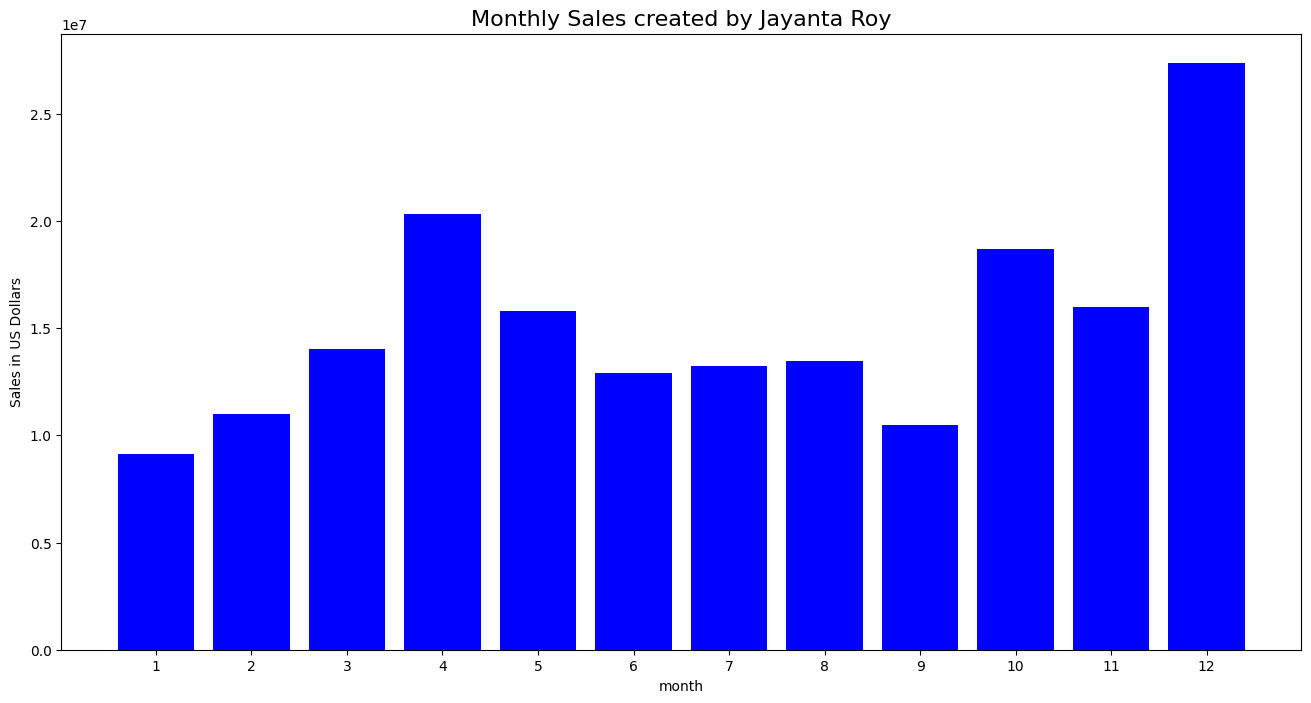

In [29]:
plt.rcParams['figure.figsize']=(16,8)
months=range(1,13)
plt.bar(months,all_data.groupby('month')['sales'].sum(),color='blue')
plt.title('Monthly Sales created by Jayanta Roy',fontsize=16)
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('Sales in US Dollars')

In [82]:
# Analyzing which City has Maximum Order

In [25]:
# Analyzing Mamimum Hour and 

In [63]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22


In [70]:
all_data['Purchase Address'][0]

0              917 1st St, Dallas, TX 75001
0              917 1st St, Dallas, TX 75001
0          359 Spruce St, Seattle, WA 98101
0    136 Church St, New York City, NY 10001
0         866 Spruce St, Portland, ME 04101
0           944 Walnut St, Boston, MA 02215
0           389 South St, Atlanta, GA 30301
0         950 Walnut St, Portland, ME 04101
0           942 Church St, Austin, TX 73301
0       669 2nd St, New York City, NY 10001
0       46 Park St, New York City, NY 10001
0           609 Cherry St, Dallas, TX 75001
0       380 North St, Los Angeles, CA 90001
Name: Purchase Address, dtype: object

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [32]:
def city(x):
    return x.split(',')[1]

In [33]:
all_data['city']= all_data['Purchase Address'].apply(city)

Text(0.5, 1.0, 'All City wise Order created by Jayanta Roy')

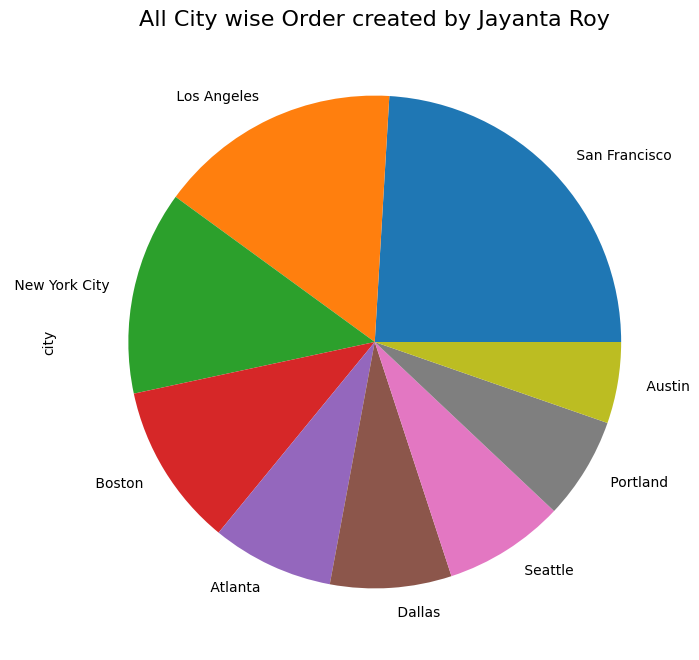

In [81]:
pd.value_counts(all_data['city']).plot(kind='pie')
plt.title('All City wise Order created by Jayanta Roy',fontsize=16)

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Text(0.5, 1.0, 'Monthly Sales by City created by Jayanta Roy')

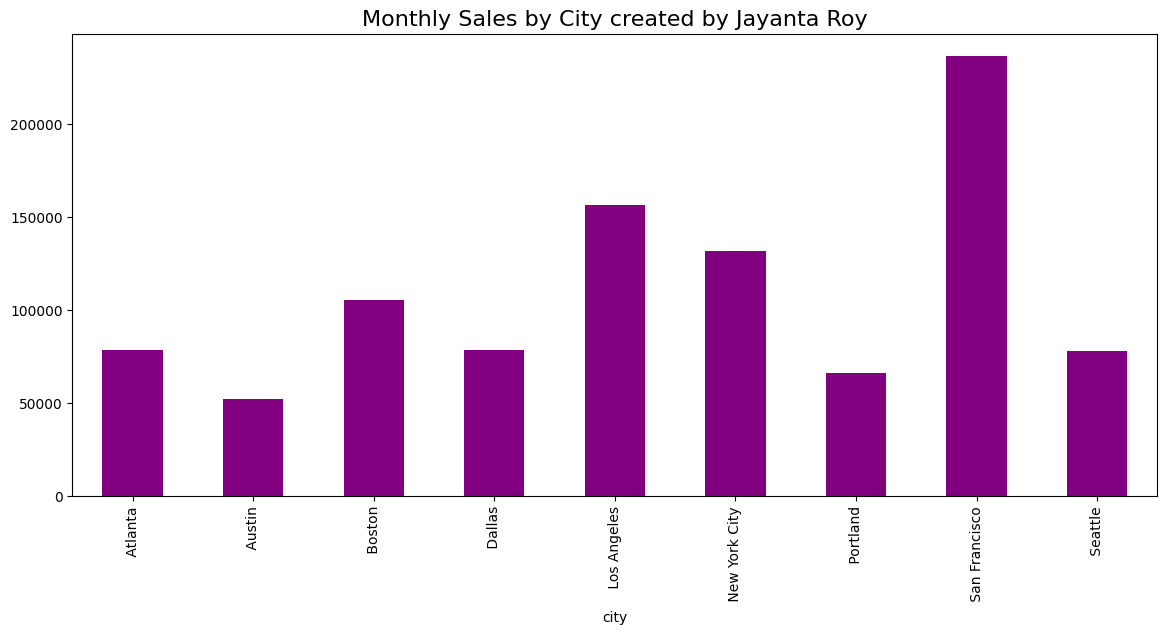

In [163]:
all_data.groupby('city')['city'].count().plot.bar(color='purple')
plt.title('Monthly Sales by City created by Jayanta Roy',fontsize=16)

In [37]:
all_data['Order Date'].dtypes

dtype('O')

In [38]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [40]:
keys=[]
hour=[]
for key, hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))
    

In [41]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

Text(0.5, 1.0, 'created by Jayanta Roy')

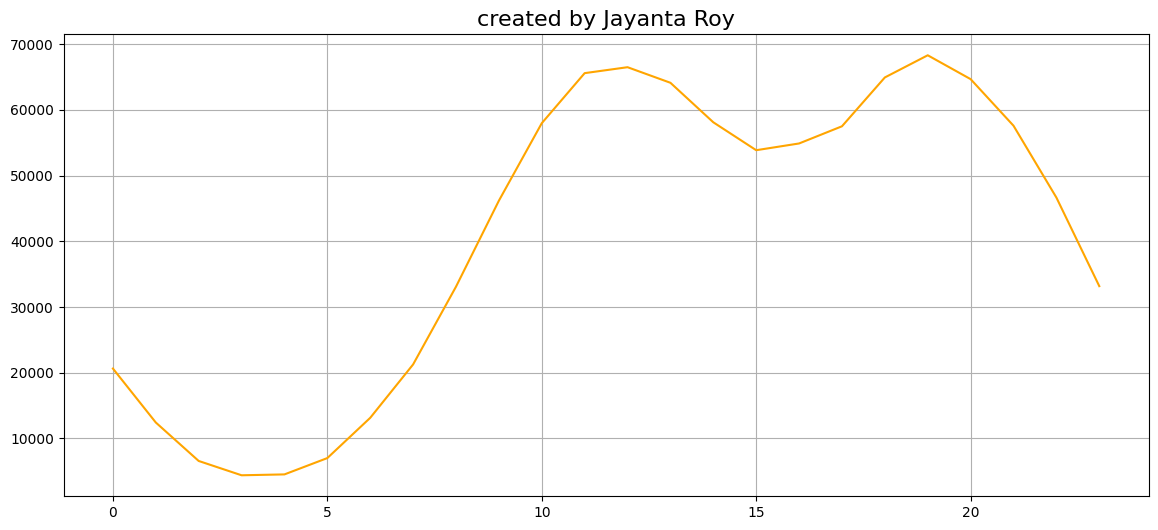

In [164]:
plt.grid()
plt.plot(keys,hour,color='orange')
plt.title('created by Jayanta Roy',fontsize=16)

In [38]:
# Analysing Most Sold Products 

In [88]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city', 'Hour'],
      dtype='object')

Text(0.5, 1.0, 'Monthly Product wise Quantity Ordered created by Jayanta Roy')

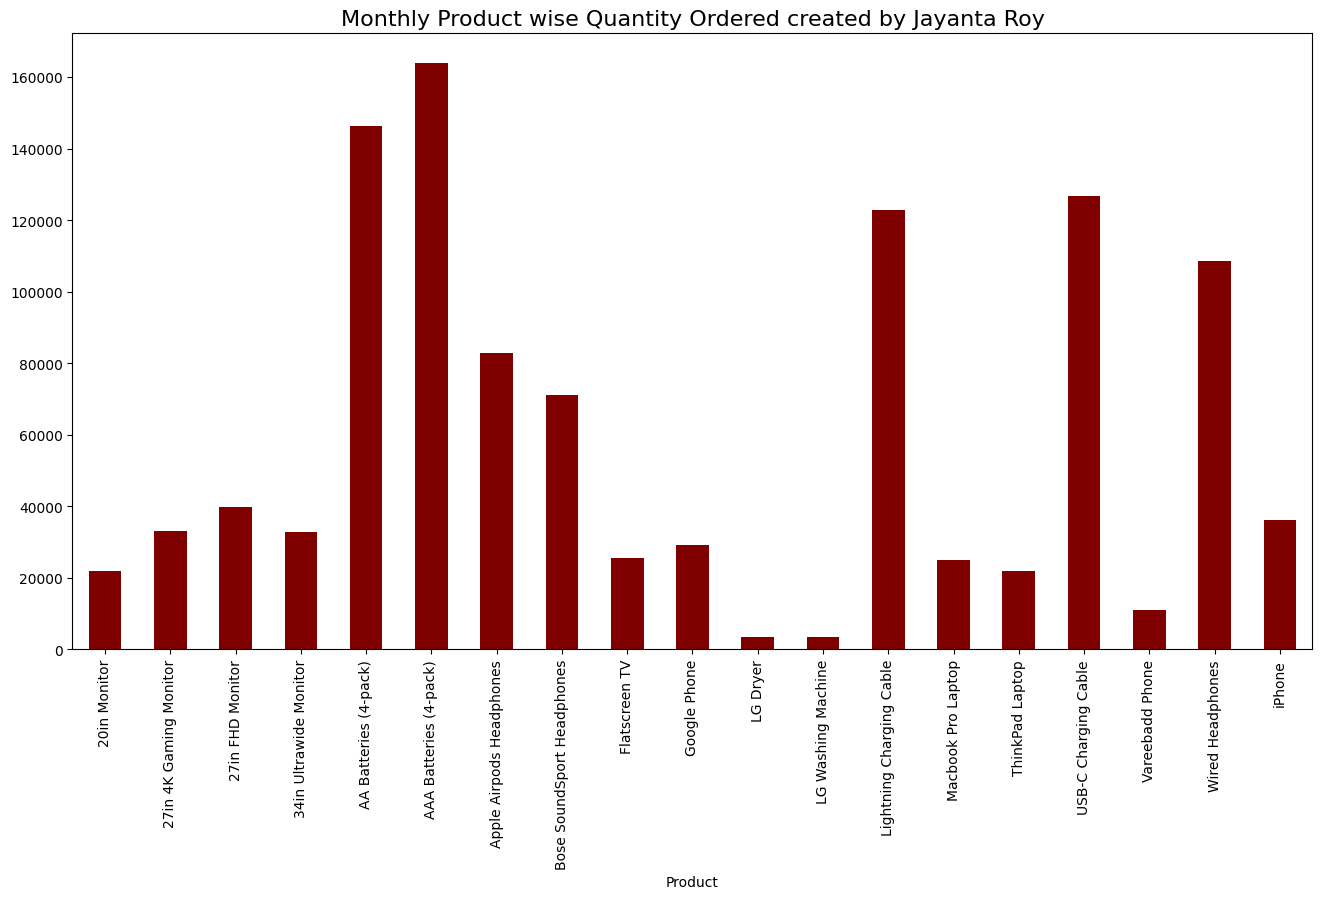

In [87]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar',color='maroon')
plt.title('Monthly Product wise Quantity Ordered created by Jayanta Roy',fontsize=16)

In [48]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [49]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Quantity Ordered'].mean()

C:\Users\Jayanta Roy\AppData\Local\Temp\ipykernel_14584\412424896.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


Text(0.5, 1.0, 'Order Count wise Avg Price of Products created by Jayanta Roy')

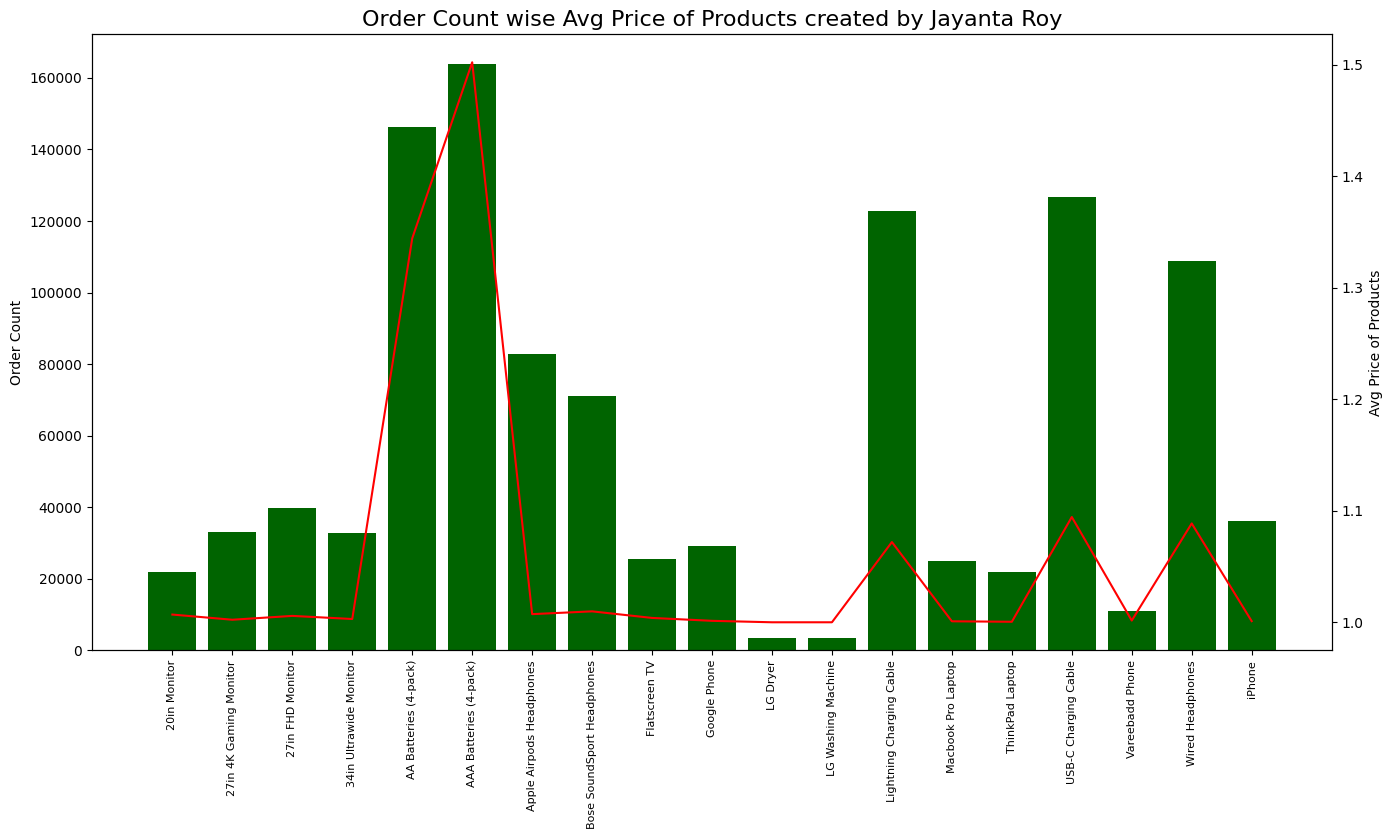

In [103]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity,color='darkgreen')
ax2.plot(products,prices, color='red')
ax1.set_xticklabels(products,rotation='vertical',size=8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg Price of Products')
plt.title('Order Count wise Avg Price of Products created by Jayanta Roy',fontsize=16)


In [ ]:
x.plot(kind='bar',stacked=True)

In [107]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [108]:
most_sold_product=all_data['Product'].value_counts()[0:5].index

In [109]:
all_data['Product'].isin(most_sold_product)

0         True
2        False
3        False
4         True
5         True
         ...  
11681     True
11682    False
11683    False
11684    False
11685     True
Name: Product, Length: 983265, dtype: bool

In [110]:
all_data[all_data['Product'].isin(most_sold_product)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10
...,...,...,...,...,...,...,...,...,...,...
11676,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas,22
11678,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco,13
11680,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco,15
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20


In [111]:
most_sold_product_df=all_data[all_data['Product'].isin(most_sold_product)]

In [112]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13


In [115]:
most_sold_product_df.groupby(['month','Product']).size()

month  Product                 
1      AA Batteries (4-pack)        5190
       AAA Batteries (4-pack)       5423
       Lightning Charging Cable     5360
       USB-C Charging Cable         5873
       Wired Headphones             5031
2      AA Batteries (4-pack)        6380
       AAA Batteries (4-pack)       6605
       Lightning Charging Cable     6975
       USB-C Charging Cable         7570
       Wired Headphones             5915
3      AA Batteries (4-pack)        8370
       AAA Batteries (4-pack)       8235
       Lightning Charging Cable     8765
       USB-C Charging Cable         8850
       Wired Headphones             7565
4      AA Batteries (4-pack)       12376
       AAA Batteries (4-pack)      11944
       Lightning Charging Cable    13216
       USB-C Charging Cable        12467
       Wired Headphones            11333
5      AA Batteries (4-pack)        9112
       AAA Batteries (4-pack)       9460
       Lightning Charging Cable     9650
       USB-C Charging Cab

In [116]:
most_sold_product_df.groupby(['month','Product']).size().unstack()

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
month,,,,,
1,5190,5423,5360,5873,5031
2,6380,6605,6975,7570,5915
3,8370,8235,8765,8850,7565
4,12376,11944,13216,12467,11333
5,9112,9460,9650,9417,8652
6,7715,7260,7820,7670,6675
7,7780,7790,8475,8340,7175
8,8141,8044,8138,8062,7157
9,6575,6411,6642,7272,5870


In [117]:
pivot=most_sold_product_df.groupby(['month','Product']).size().unstack()

In [118]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
month,,,,,
1,5190,5423,5360,5873,5031
2,6380,6605,6975,7570,5915
3,8370,8235,8765,8850,7565
4,12376,11944,13216,12467,11333
5,9112,9460,9650,9417,8652
6,7715,7260,7820,7670,6675
7,7780,7790,8475,8340,7175
8,8141,8044,8138,8062,7157
9,6575,6411,6642,7272,5870


<AxesSubplot: title={'center': 'Monthly Most Sold Products created by Jayanta Roy'}, xlabel='month'>

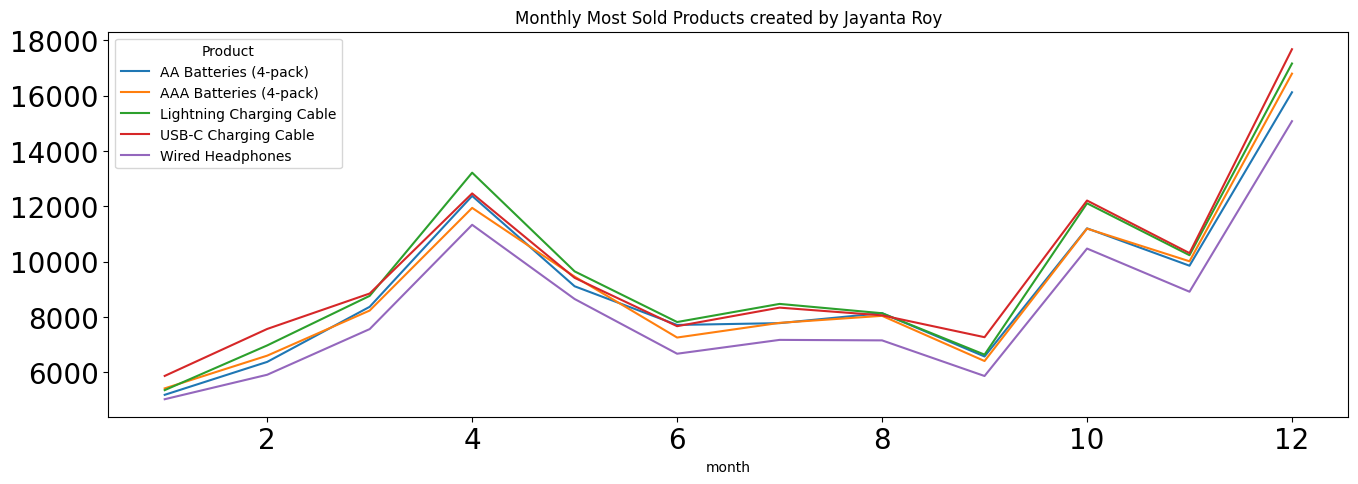

In [125]:
pivot.plot(figsize=(16,5),title='Monthly Most Sold Products created by Jayanta Roy',fontsize=20)

In [ ]:
# What Products are Most often Sold together?

In [126]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city', 'Hour'],
      dtype='object')

In [127]:
all_data['Order ID']

0        176558
2        176559
3        176560
4        176560
5        176561
          ...  
11681    259353
11682    259354
11683    259355
11684    259356
11685    259357
Name: Order ID, Length: 983265, dtype: object

In [128]:
df_duplicated=all_data[all_data['Order ID'].duplicated(keep=False)]

In [129]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [137]:
dup_products= df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x:','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

In [138]:
dup_products

,Order ID,grouped_products
0,141234,"iPhone,iPhone,iPhone,iPhone,iPhone"
1,141235,"Lightning Charging Cable,Lightning Charging Ca..."
2,141236,"Wired Headphones,Wired Headphones,Wired Headph..."
3,141237,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,141238,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...
178432,319666,"Lightning Charging Cable,Lightning Charging Ca..."
178433,319667,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
178434,319668,"Vareebadd Phone,Vareebadd Phone,Vareebadd Phon..."
178435,319669,"Wired Headphones,Wired Headphones,Wired Headph..."


In [139]:
dup_products_df=df_duplicated.merge(dup_products,how='left',on='Order ID')

In [140]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,grouped_products
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...,...,...,...,...,...,...,...,...,...
983260,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
983261,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone,iPhone,iPhone,iPhone"
983262,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,"iPhone,iPhone,iPhone,iPhone,iPhone"
983263,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [141]:
no_dup_df= dup_products_df.drop_duplicates(subset=['Order ID'])

In [142]:
no_dup_df.shape

(178437, 11)

Text(0.5, 1.0, 'Most Sold Products with together created by Jayanta Roy')

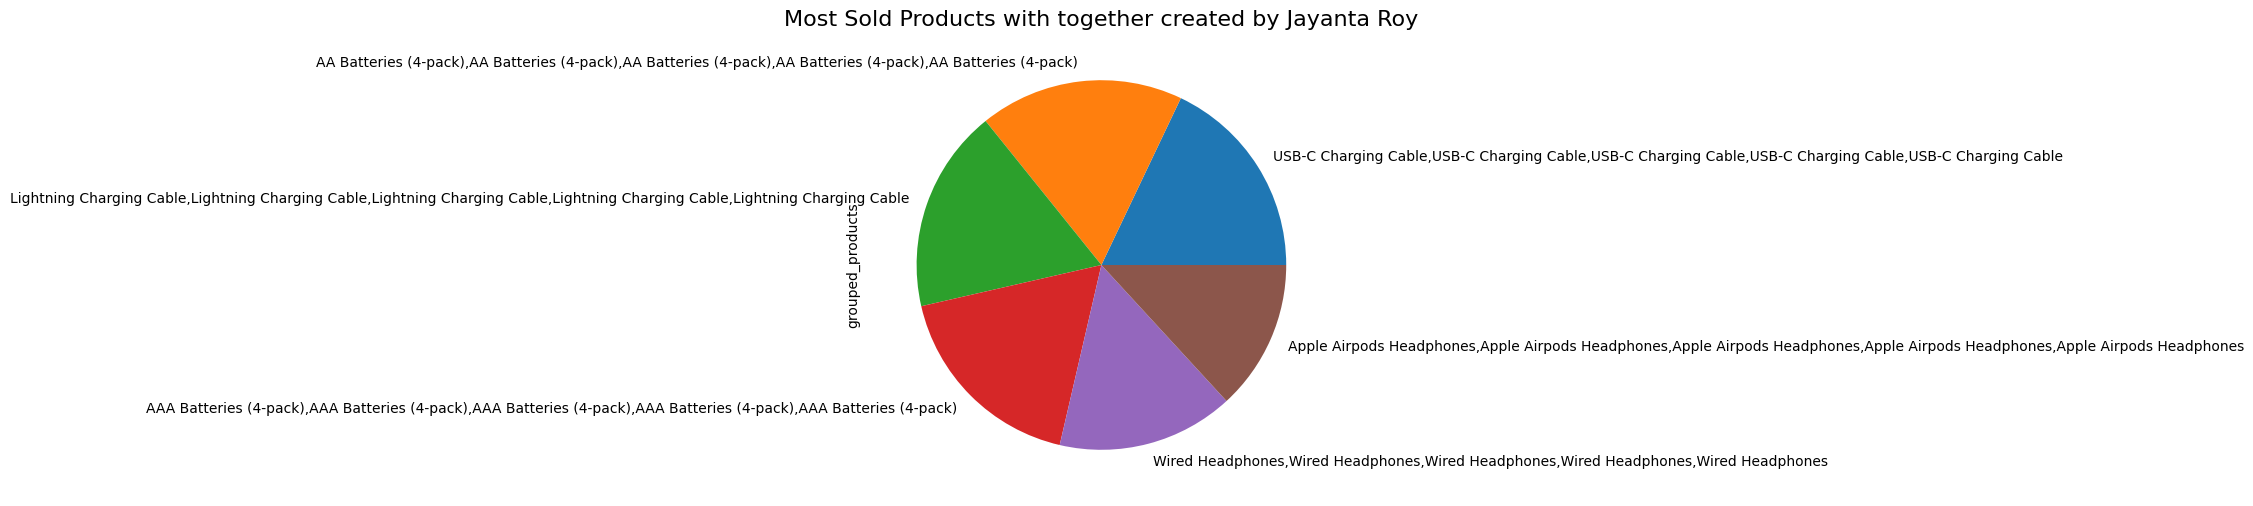

In [162]:

no_dup_df['grouped_products'].value_counts()[0:6].sort_values(ascending=False).plot.pie()
plt.title('Most Sold Products with together created by Jayanta Roy',fontsize=16)